<a href="https://colab.research.google.com/github/kAi3345/Dark-Matter/blob/main/rotation_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as ac
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from google.colab import files

In [3]:
upload = files.upload()      #upload the galaxy rotation data file

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [4]:
import astropy.io.ascii


In [5]:
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")     # open the galaxy rotation data file in python
tab

col1,col2,col3,col4
float64,float64,float64,float64
25.0,5.68,235.5,17.8
30.0,6.81,242.9,0.8
35.0,7.95,251.1,0.7
40.0,9.08,262.0,2.1
45.0,10.22,258.9,6.9
50.0,11.35,255.1,5.7
55.0,12.49,251.8,17.1
60.0,13.62,252.1,7.4
65.0,14.76,251.0,18.6


Text(0, 0.5, 'velocity [km/s]')

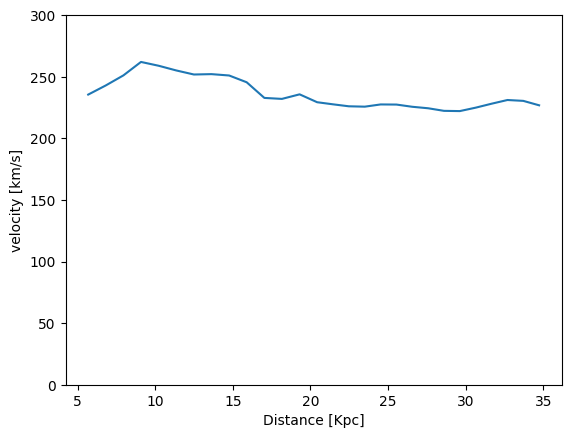

In [6]:
dis = tab['col2']               # creating a distance array with the data of column 2 of the file galaxy_rotation_2006.txt
vel = tab['col3']               # creating a velocity array with the data of column 2 of the file galaxy_rotation_2006.txt
plt.plot(dis,vel)               # draw a picture with distance array and velocity array
plt.ylim(0,300)                 # limit y axis from 0 to 300
plt.xlabel("Distance [Kpc]")    # label x-axis as the distance in kiloparsec
plt.ylabel("velocity [km/s]")   # label y-axis as the velocity in km/s

In [7]:
def calc_orbital_velocity(mass, radius):       #define a function that calculate the orbital velocity using input mass and radius
  return np.sqrt((ac.G * mass) / radius)

In [8]:
mass = 1 * u.earthMass                         #assign mass equal to the mass of Earth
radius = 1 * u.earthRad                        #assign radius equal to the radius of Earth

orb_vel = calc_orbital_velocity(mass,radius)   # calculate the orbital velocity using the predefined function

print(orb_vel.to(u.km / u.s))                  # change the unit to km/s and print out the velocity


7.905388234385281 km / s


In [9]:
mass = 3e7 * u.solMass                         # using mass of the black hole in Andromeda galaxy
radius = 5.68 * 1000 * u.parsec                # using radius of the black hole in Andromeda galaxy
orb_vel = calc_orbital_velocity(mass,radius)   # calculate the orbital velocity using the predefined function

print(orb_vel.to(u.km / u.s))                  # change the unit to km/s and print out the velocity


4.766142291386287 km / s


In [10]:
vel_bh = np.zeros(np.shape(dis)) * u.km / u.s  # create a velocity array with the same number of elements as the distance array

In [11]:
for i, radius in enumerate(dis):               #using loop to calculate the orbital velocity of each black hole in the data set
  rad = radius * 1000 * u.parsec               #change unit of radius of kpc to pc
  orb_vel = calc_orbital_velocity(mass,rad)    #calculate orbital velocity using the function
  vel_bh[i] = orb_vel                          #assign each orbital velocity to the vel_bh array
  print("The orbital velocity at ", radius, " kpc = ",orb_vel.to(u.km/u.s))          #print the radius of each black hole and corresponding orbital speed


The orbital velocity at  5.68  kpc =  4.766142291386287 km / s
The orbital velocity at  6.81  kpc =  4.352789004155528 km / s
The orbital velocity at  7.95  kpc =  4.028632086788635 km / s
The orbital velocity at  9.08  kpc =  3.7696258549122557 km / s
The orbital velocity at  10.22  kpc =  3.5531678501224344 km / s
The orbital velocity at  11.35  kpc =  3.3716558645298256 km / s
The orbital velocity at  12.49  kpc =  3.214104201911268 km / s
The orbital velocity at  13.62  kpc =  3.077886621912613 km / s
The orbital velocity at  14.76  kpc =  2.956636901678396 km / s
The orbital velocity at  15.89  kpc =  2.8495692993877366 km / s
The orbital velocity at  17.03  kpc =  2.7525413240352865 km / s
The orbital velocity at  18.16  kpc =  2.6655280045445924 km / s
The orbital velocity at  19.3  kpc =  2.585607014258112 km / s
The orbital velocity at  20.43  kpc =  2.513083903274837 km / s
The orbital velocity at  21.45  kpc =  2.4526045154369367 km / s
The orbital velocity at  22.47  kpc = 

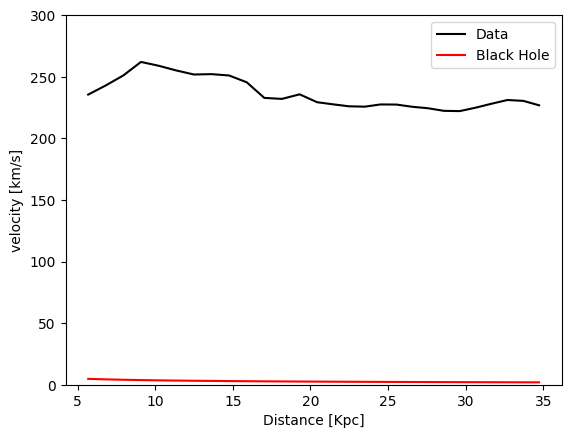

In [12]:
dis = tab['col2']                                                          # creating a distance array with the data of column 2 of the file galaxy_rotation_2006.txt
vel = tab['col3']                                                          # creating a velocity array with the data of column 2 of the file galaxy_rotation_2006.txt
plt.plot(dis,vel, color ="black", label = "Data")                          # draw a black line labeled by "Data" with x values from distance array and y values from velocity array
plt.plot(dis,vel_bh.value, color = "red", label = "Black Hole")            # draw a red line labeled by "Black Hole" with x values from distance array and y values from vel_bh array that stores the black hole orbital velocity
plt.ylim(0,300)                                                            # limit y axis from 0 to 300
plt.xlabel("Distance [Kpc]")                                               # label x-axis as the distance in kiloparsec
plt.ylabel("velocity [km/s]")                                              # label y-axis as the velocity in km/s
plt.legend()

In [41]:
mass_Bulge = 2.2e10 * u.solMass

radius_Bulge = 1.99e3 * u.parsec

density_Bulge = mass_Bulge / (4/3 * np.pi * radius_Bulge**3)

#def calc_Mass_Bulge (bulgeDensity,bulgeRadius):
  #bulgeVolume = 4 /3 * np.pi * bulgeRadius ** 3;
  #return bulgeDensity * bulgeVolume

vel_bul = np.zeros(np.shape(dis)) * u.km / u.s

for i, radius in enumerate(dis):
  rad = radius * 1000 * u.parsec
  orb_vel = calc_orbital_velocity(mass_Bulge,rad)
  vel_bul[i] = orb_vel


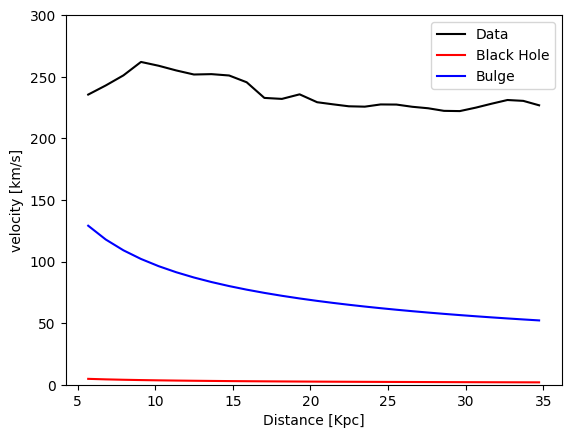

In [42]:
dis = tab['col2']                                                          # creating a distance array with the data of column 2 of the file galaxy_rotation_2006.txt
vel = tab['col3']                                                          # creating a velocity array with the data of column 2 of the file galaxy_rotation_2006.txt
plt.plot(dis,vel, color ="black", label = "Data")                          # draw a black line labeled by "Data" with x values from distance array and y values from velocity array
plt.plot(dis,vel_bh.value, color = "red", label = "Black Hole")            # draw a red line labeled by "Black Hole" with x values from distance array and y values from vel_bh array that stores the black hole orbital velocity
plt.plot(dis,vel_bul.value,color = "blue", label = "Bulge")
plt.ylim(0,300)                                                            # limit y axis from 0 to 300
plt.xlabel("Distance [Kpc]")                                               # label x-axis as the distance in kiloparsec
plt.ylabel("velocity [km/s]")                                              # label y-axis as the velocity in km/s
plt.legend()

Text(0, 0.5, 'velocity [km/s]')

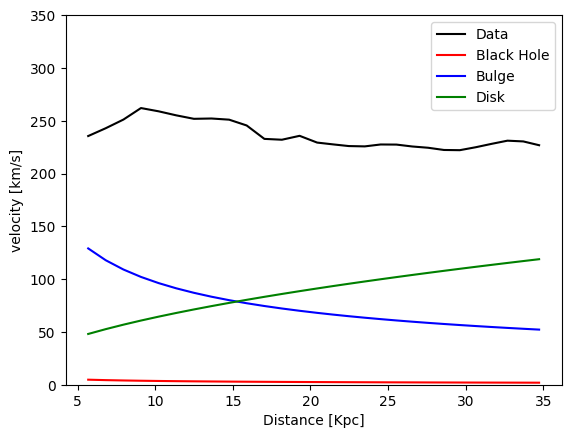

In [53]:
mass_Disk = 10.3e10 * u.solMass
rad_Disk = 3.3e4 * u.parsec
dens_Disk = mass_Disk / (np.pi * rad_Disk ** 2)

def calc_diskMass(density, radius):
  area = np.pi * radius ** 2
  return density * area

rad = dis * 1000 * u.parsec
diskMass = calc_diskMass(dens_Disk,rad)

vel_disk = np.zeros(np.shape(dis)) * u.km / u.s

vel_disk = calc_orbital_velocity(diskMass,rad).to (u.km/ u.s)

dis = tab['col2']                                                          # creating a distance array with the data of column 2 of the file galaxy_rotation_2006.txt
vel = tab['col3']                                                          # creating a velocity array with the data of column 2 of the file galaxy_rotation_2006.txt
plt.plot(dis,vel, color ="black", label = "Data")                          # draw a black line labeled by "Data" with x values from distance array and y values from velocity array
plt.plot(dis,vel_bh.value, color = "red", label = "Black Hole")            # draw a red line labeled by "Black Hole" with x values from distance array and y values from vel_bh array that stores the black hole orbital velocity
plt.plot(dis,vel_bul.value,color = "blue", label = "Bulge")
plt.plot(dis,vel_disk.value,color = "green", label = "Disk")
plt.legend(loc = "upper right")
plt.ylim(0,350)                                                            # limit y axis from 0 to 300
plt.xlabel("Distance [Kpc]")                                               # label x-axis as the distance in kiloparsec
plt.ylabel("velocity [km/s]")



Text(0, 0.5, 'velocity [km/s]')

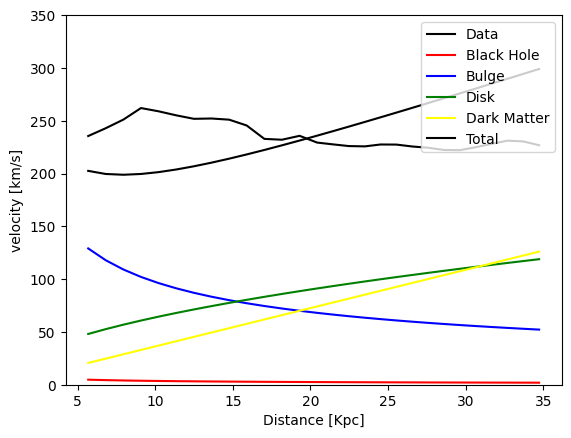

In [54]:
mass_Dmatter = 1.1e11 * u.solMass
radius_Dmatter = 3.3e4 * u.parsec

density_Dmatter = mass_Dmatter / (4/3 * np.pi * radius_Dmatter**3)

def calc_dMatterMass (density,radius):
  volume = 4/3 * np.pi * radius ** 3;
  return density * volume;

dMatterMass = calc_dMatterMass(density_Dmatter,rad)

vel_dMatter = np.zeros(np.shape(dis)) * u.km / u.s

vel_dMatter = calc_orbital_velocity(dMatterMass,rad).to (u.km/ u.s)

vel_total = vel_dMatter + vel_bh + vel_bul + vel_disk;

dis = tab['col2']                                                          # creating a distance array with the data of column 2 of the file galaxy_rotation_2006.txt
vel = tab['col3']                                                          # creating a velocity array with the data of column 2 of the file galaxy_rotation_2006.txt
plt.plot(dis,vel, color ="black", label = "Data")                          # draw a black line labeled by "Data" with x values from distance array and y values from velocity array
plt.plot(dis,vel_bh.value, color = "red", label = "Black Hole")            # draw a red line labeled by "Black Hole" with x values from distance array and y values from vel_bh array that stores the black hole orbital velocity
plt.plot(dis,vel_bul.value,color = "blue", label = "Bulge")
plt.plot(dis,vel_disk.value,color = "green", label = "Disk")
plt.plot(dis,vel_dMatter.value,color = "yellow", label = "Dark Matter")
plt.plot(dis,vel_total.value, color = "black", label = "Total")
plt.legend(loc = "upper right")
plt.ylim(0,350)                                                            # limit y axis from 0 to 300
plt.xlabel("Distance [Kpc]")                                               # label x-axis as the distance in kiloparsec
plt.ylabel("velocity [km/s]")


In [48]:
df = pd.DataFrame(dis)
df['radius'] = dis;
df['mass_bhole'] = mass
df['mass_disk'] = diskMass
df['mass_bulge'] = mass_Bulge
pd.set_option('display.float_format', '{:.2g}'.format)
df

,col2,radius,mass_bhole,mass_disk,mass_bulge
0,5.7,5.7,3e+07,3.7e+11 solMass,2.2e+10
1,6.8,6.8,3e+07,5.3e+11 solMass,2.2e+10
2,8,8,3e+07,7.2e+11 solMass,2.2e+10
3,9.1,9.1,3e+07,9.4e+11 solMass,2.2e+10
4,10,10,3e+07,1.2e+12 solMass,2.2e+10
5,11,11,3e+07,1.5e+12 solMass,2.2e+10
6,12,12,3e+07,1.8e+12 solMass,2.2e+10
7,14,14,3e+07,2.1e+12 solMass,2.2e+10
8,15,15,3e+07,2.5e+12 solMass,2.2e+10
9,16,16,3e+07,2.9e+12 solMass,2.2e+10
